# Exercises lecture chapters 10 and 11

Multiple Choice Question: Calculate the sampling error using the Bonferroni approach. The sample size of each treatment is $n_i=5$ and the experimentwise error rate is set to $\alpha = 0.02$. The number of treatments is $k = 5$ and the mean square for error is $MSE = 25$.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as sts
%matplotlib inline
plt.close('all')


In [2]:
# Number of treatments k
k = 5
# Total number of data points over all treatments
n = k * 5
# Experimentwise error
alpha = 0.02
# mean squares for error
MSE = 25
# standard deviation estimate based on all treatements
s = np.sqrt(MSE)
# degrees of freedom used in the t-distribution
df = n-k
# The number of pairwise comparisons
c = k*(k-1)/2

# The student t-distribution
# Note we take the degrees of freedom associated with MSE
rv1 = sts.t(n-k)

# Note that your confidence interval for the comparisonwise error is alpha / c
tt = - rv1.ppf(alpha/(2*c))
print ('t_alpha/(2c) ',tt) 

# sampling error
SE = tt * s * np.sqrt(1/5 + 1/5)
print('Sampling error: ', SE)


t_alpha/(2c)  3.551808342710066
Sampling error:  11.231804175351717


## Spot welding
In spot welding, the current has an effect on the weld strength. In a particular experiment, with all other factors being held fixed, the strength of the weld in Newton is measured against the current in Ampère. The obtained data is given below.



y = Weld Strength (kN)
x = Current (kA)

1. Visualize the data in a scatter plot

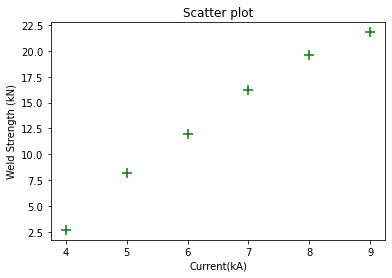

In [3]:

# THe data 
#Current in kA
x = np.array([ 4.,  5., 6., 7., 8., 9.])
# Weld Strength in kN
y=np.array([2.7, 8.2, 12.0, 16.2, 19.6, 21.8])
# number of observations
n = 6

# Scatter plot
fig = plt.figure()
plt.scatter(x,y, marker='+', c='g',s=100)
plt.title('Scatter plot')
plt.xlabel('Current(kA)')
plt.ylabel('Weld Strength (kN)')
plt.show()

2. Use the method of least squares to estimate the values of $\beta_0$ and $\beta_1$.
Note that np.mean(x) is a scalar white x in a vector. Here broadcasting is used such that x-np.mean(x) is a vector.
https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html

 $*$ is an element wise multiplication
 
 $** n$ is element wise power of n 

In [4]:
# Elementwise multiplication and broadcasting
# Current in kA, x is a vector
print(x)
# Mean current is a scalar
print (np.mean(x))
# Current - mean current an example of broadcasting
print(x - np.mean(x))
# Weld Strength - mean Weld Strength
print(y-np.mean(y))
# (x-np.mean(x))*(y-np.mean(y)) elementwise multiplication
print((x-np.mean(x))*(y-np.mean(y)))



[4. 5. 6. 7. 8. 9.]
6.5
[-2.5 -1.5 -0.5  0.5  1.5  2.5]
[-10.71666667  -5.21666667  -1.41666667   2.78333333   6.18333333
   8.38333333]
[26.79166667  7.825       0.70833333  1.39166667  9.275      20.95833333]


In [5]:
# From the data to the least squares line
SSxy = np.sum((x-np.mean(x))*(y-np.mean(y)))
print('SSxy: ',SSxy)
SSxx = np.sum((x-np.mean(x))**2)
print('SSxx: ',SSxx)
b1h = SSxy / SSxx
print('beta1hat: ',b1h)
b0h = np.mean(y) - b1h * np.mean(x)
print('beta0hat: ',b0h)



SSxy:  66.95000000000002
SSxx:  17.5
beta1hat:  3.8257142857142865
beta0hat:  -11.450476190476197


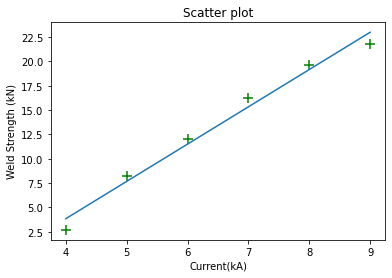

yhat:  [ 3.85238095  7.67809524 11.50380952 15.32952381 19.1552381  22.98095238]


In [6]:
# show the least-squares line
fig = plt.figure()
plt.scatter(x,y, marker='+', c='g',s=100)
plt.title('Scatter plot')
plt.xlabel('Current(kA)')
plt.ylabel('Weld Strength (kN)')
yh = b1h * x + b0h
plt.plot(x, yh)
plt.show()
print('yhat: ',yh)

2. Predict the reaction time when $x = 5.5 kA$.

In [7]:
print('Weld Strength (kN) for 5.5 kA: ', b1h * 5.5 + b0h)

Weld Strength (kN) for 5.5 kA:  9.590952380952379


3. Find the SSE.

In [8]:
#%% Sum of squared error

SSE = np.sum((y-yh)**2)
SSyy = np.sum((y-np.mean(y))**2)
print ('SSE: ',SSE)
print(SSyy-b1h*SSxy)

SSE:  4.1967619047619005
4.196761904761786


4. Give an estimate of the standard error of the regression model. 

In [9]:
s = np.sqrt(SSE/(n-2))

print('s: ',s)


s:  1.0242999932590429


5. Test the linear regression slope. Conduct a test at a $\alpha = 0.05$ to determine whether the weld strength $y$ is positvely linearly related to the amount of current $x$.

 * The null-hypothesis and the alternative-hypothesis are:

$H_0 : \beta_1 = 0 $ 

$H_a : \beta_1 > 0$

 * Construction of the rejection region:

In [10]:
alpha = 0.05

# degrees of freedom
df = n-2

# one tailed approach
tt = sts.t.ppf(1-alpha,df)
print('t_alpha : ',tt)

t_alpha :  2.13184678133629


 * t-statistic:

In [11]:
#Estimate standard error of the least-squares slope

s_b1_h = s / np.sqrt(SSxx)

print('stand div of beta1 hat',s_b1_h)

t = b1h / s_b1_h;
print('t: ',t)
print ('reject H0 accept Ha: ', t>tt)

stand div of beta1 hat 0.24485453129684692
t:  15.624437356547102
reject H0 accept Ha:  True


 * Observed significance level

In [12]:

p = 1-sts.t.cdf(t,df)

print ('p: ',p)

print ('reject H0 accept Ha: ', p<alpha)

p:  4.899320456619449e-05
reject H0 accept Ha:  True


 * Conclusion
We reject the null-hypothesis in favor of the alternative-hypothesis at a $\alpha = 0.05$ level of significance.
We conclude that the slope of the linear regression model is not equal to zero. The sample evidence indicates that the current contributes in a postive linear way for the prediction of the weld strenght y . 

6. Calculate the correlation coeficient 



In [13]:

print('SSyy: ',SSyy)

r = SSxy / np.sqrt(SSxx*SSyy)

print('correlation coefficient: ',r)

SSyy:  260.3283333333333
correlation coefficient:  0.9919067325262958
